In [52]:
from sklearn.datasets import make_regression

In [53]:
# Allows to create a dataset for a regression excercise
# READ THE DOCUMENTATION FROM SCIKIT LEARN
X, y = make_regression(n_samples=150, n_features=1, noise=50, random_state=42)

In [54]:
X.shape, y.shape

((150, 1), (150,))

Text(0.5, 1.0, 'Example Dataset')

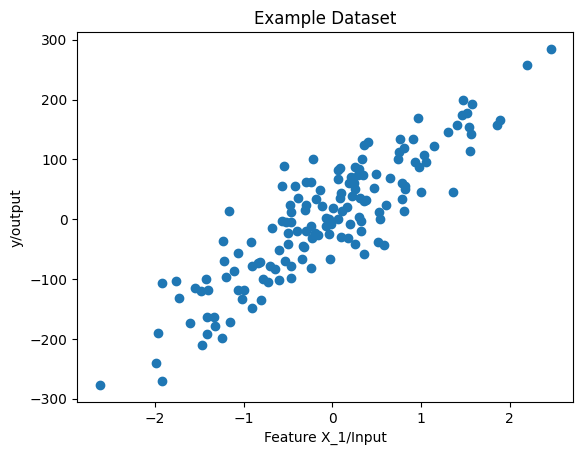

In [55]:
import matplotlib.pyplot as plotter
plotter.scatter(X, y)
plotter.xlabel("Feature X_1/Input")
plotter.ylabel("y/output")
plotter.title("Example Dataset")

In [56]:
from sklearn.model_selection import train_test_split

# Design matrix is in UPPERCASE
# Labels are in lowercase
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape


(120, 1)

# Start Model coding

In [57]:
import numpy as numpy
class LinearRegression:
    def __init__(self,
                learning_rate=0.01,
                epochs=100
                ):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        return
    
    def predict(self, X):
        return numpy.dot(X, self.weights) + self.bias

    def fit(self, X, y):
        # Define rows (m) and columns/features (n)
        m, n = X.shape

        # Define weights, initially we don't care about it, start with random value
        # Create a single random weight for each feature
        self.weights = numpy.random.rand(n, 1)
        # Bias is a scalar
        self.bias = numpy.random.rand(1)

        # Reshape
        y = y.reshape(m, 1)

        # Save losses
        losses_list = list()
        # Save bias
        bias_list = list()
        # Save weights
        weights_list = list()

        # Go over each epoch/iterations

        for epoch in range(self.epochs):

            # calculate prediction
            y_predict = numpy.dot(X, self.weights) + self.bias

            # get current loss - L - J
            # Mean Square Error, this is how bad our prediction is
            loss = numpy.mean((y - y_predict)**2)
            # Append the loss
            losses_list.append(loss)

            # calculate gradient
            dw = (-2 / m) * numpy.dot(X.T, (y-y_predict))
            db = (-2 / m) * numpy.sum((y-y_predict))

            # update parameters
            self.weights = self.weights - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db

            weights_list.append(self.weights)
            bias_list.append(self.bias)

            #print(f'epoch:{epoch:#d} loss:{loss} weights:{self.weights} bias:{self.bias}')

        return self.weights, self.bias, losses_list, bias_list, weights_list

In [58]:
model = LinearRegression(learning_rate=0.1, epochs=30)
weights, bias, losses_list, bias_list, weights_list = model.fit(X_train, y_train)

Text(0, 0.5, 'loss')

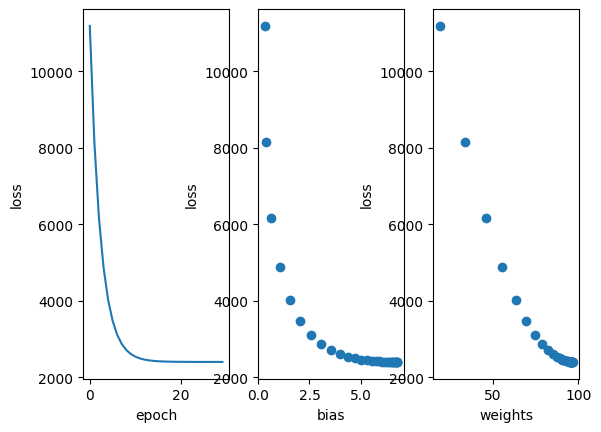

In [59]:
plotter.subplot(1, 3, 1)
plotter.plot(numpy.arange(len(losses_list)), losses_list)
plotter.xlabel("epoch")
plotter.ylabel("loss")

plotter.subplot(1, 3, 2)
plotter.scatter(bias_list, losses_list)
plotter.xlabel("bias")
plotter.ylabel("loss")

plotter.subplot(1, 3, 3)
plotter.scatter(weights_list, losses_list)
plotter.xlabel("weights")
plotter.ylabel("loss")

Text(0, 0.5, 'Y_total prediction')

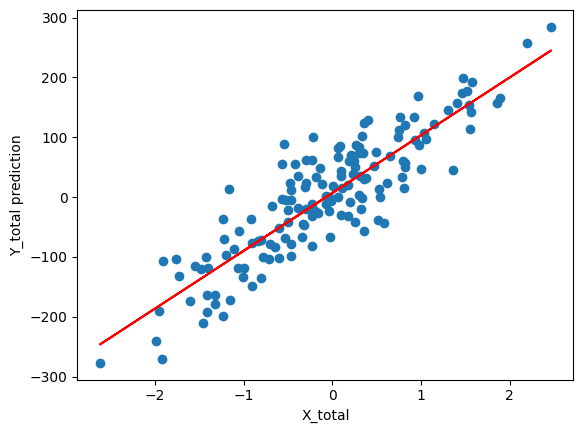

In [60]:
prediction = model.predict(X)

plotter.scatter(X, y)
plotter.plot(X, prediction, c = 'r')
plotter.xlabel("X_total")
plotter.ylabel("Y_total prediction")


The MSE of test dataset is:2124.1657016725558


Text(0, 0.5, 'Y_test prediction')

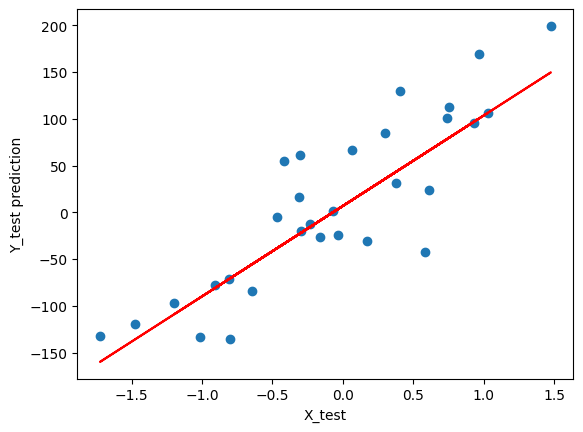

In [61]:
prediction = model.predict(X_test)

m, n = X_test.shape
loss = numpy.mean((y_test.reshape(m, 1) - prediction)**2)
print(f'The MSE of test dataset is:{loss}')

plotter.scatter(X_test, y_test)
plotter.plot(X_test, prediction, c = 'r')
plotter.xlabel("X_test")
plotter.ylabel("Y_test prediction")